In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [2]:
train = pd.read_csv('data/train.csv')

### Exploratory Data Analysis

In [3]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Feature Breakdown:

- Categorical: Survived, Pclass, Sex, Embarked
- Numerical: Age, Fare, SibSp, Parch
- Mixed: Name, Ticket, Cabin

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

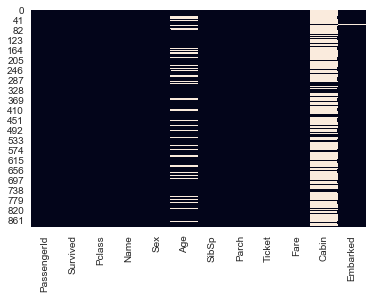

In [7]:
sns.heatmap(train.isnull(), cbar=False)

Assumptions:
- `passengerId` has no influence on the data -> drop
- `Cabin` is missing most of its values and therefore cannot be imputed -> drop
- `Ticket` is alphanumerical (difficult to work with) and 23% of values aren't unique -> drop?
- `Name` is a mixture of names and titles, seemingly doesn't affect survival -> drop?

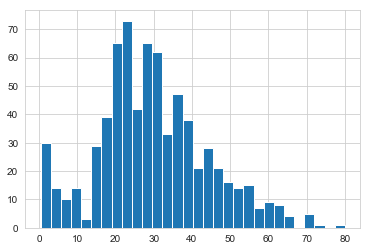

In [8]:
train['Age'].hist(bins=30)

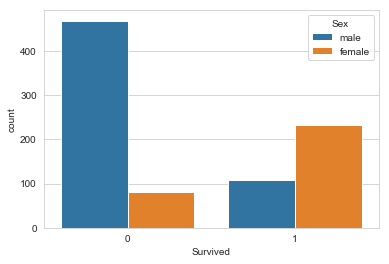

In [9]:
sns.countplot(x='Survived', data=train, hue='Sex')

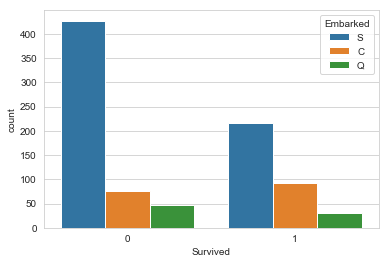

In [10]:
sns.countplot(x='Survived', data=train, hue='Embarked')

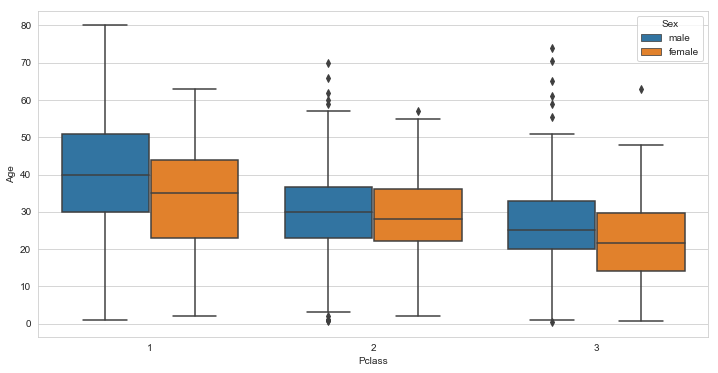

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=train)

In [12]:
medians = train.groupby(['Pclass','Sex'])['Age'].median().values
medians = [str(np.round(s, 2)) for s in medians]
medians

['35.0', '40.0', '28.0', '30.0', '21.5', '25.0']

 - `age_imputation` imputes the age of a passenger with the median value for their respective Pclass and Sex.
 - `gender` hot encodes male (1) / female (0).
 - `southampton` and `queenstown` hot encodes the port of embarking.

In [13]:
def age_imputation (cols):
    Age = cols[0]
    Sex = cols[1]
    Pclass = cols[2]
    
    if pd.isnull(Age):
        if Pclass == 1 and Sex == 'male':
            return 40
        elif Pclass == 1 and Sex == 'female':
            return 35
        elif Pclass == 2 and Sex == 'male':
            return 30
        elif Pclass == 2 and Sex == 'female':
            return 28
        elif Pclass == 3 and Sex == 'male':
            return 25
        elif Pclass == 3 and Sex == 'female':
            return 22
    else:
        return Age

In [14]:
def gender (val):
    if val == 'male':
        return 1
    else:
        return 0

In [15]:
def southampton (col):
    Embarked = col
    
    if Embarked == 'S':
        return 1
    else:
        return 0

def queenstown (col):
    Embarked = col
    
    if Embarked == 'Q':
        return 1
    else:
        return 0

In [16]:
train['Age'] = train[['Age','Sex','Pclass']].apply(age_imputation,axis=1)

In [17]:
train['Sex'] = train['Sex'].apply(lambda x: gender(x))

In [18]:
train['S'] = train['Embarked'].apply(lambda x: southampton(x))
train['Q'] = train['Embarked'].apply(lambda x: queenstown(x))

In [19]:
train.drop(['Cabin', 'PassengerId', 'Name', 'Ticket', 'Embarked'], axis=1, inplace=True)

In [20]:
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,S,Q
0,0,3,1,22.0,1,0,7.2500,1,0
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,1,0
3,1,1,0,35.0,1,0,53.1000,1,0
4,0,3,1,35.0,0,0,8.0500,1,0
5,0,3,1,25.0,0,0,8.4583,0,1
6,0,1,1,54.0,0,0,51.8625,1,0
7,0,3,1,2.0,3,1,21.0750,1,0
8,1,3,0,27.0,0,2,11.1333,1,0
9,1,2,0,14.0,1,0,30.0708,0,0


### Machine Learning Models

1. Logistic Regression - Tiago
2. Random Forest Classification - Sadiyah
3. Support Vector Machine - Raman
4. Neural Network - Adesh

In [21]:
train.to_csv('data/train_clean.csv')